![Image One](One.png)


**_The key to success in any organization is attracting and retaining top talent. This analysis is useful for an HR Analyst as its task is to determine which factors keep employees at the company and which prompt others to leave. By knowing these factors the HR analyst can change to prevent the loss of good people._**

<div style="text-align: center; background-color: #856ff8; padding: 10px;">
    <h2 style="font-weight: bold;">OUTLINE</h2>
</div>

- Importing Various Modules
- Loading Dataset
- Data Wrangling
    - Computing the size of DataFrame
    - Enlist the Column Labels
    - Clean column names by replacing non-alphanumeric characters with underscores
    - Encode the target variable 'Attrition' (Yes/No) into numerical values (1/0)
    - Separate the features (X) and the target variable (y) and Encode categorical features into numerical values
    - Split the data into training (75%) and testing (25%) sets and scale featues
    - Plotting the accuracies

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">IMPORTING VARIOUS MODULES</h2>
</div>

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">LOADING DATASET</h2>
</div>

In [12]:
# Load the data
df = pd.read_csv('IBM-HR-Analytics-Employee-Attrition-and-Performance.csv')

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">DATA WRANGLING</h2>
</div>

## <span style='color:blue'> 1] Computing size of dataset </span>

In [13]:
# Print the shape of the DataFrame
print("The shape of data frame:", df.shape)
# Print the length (number of rows) of the DataFrame
print("Number of Rows in the dataframe:", len(df))
# Print the number of columns in the DataFrame
print("Number of Columns in the dataframe:", len(df.columns))

The shape of data frame: (1470, 35)
Number of Rows in the dataframe: 1470
Number of Columns in the dataframe: 35


## <span style='color:blue'> 2] Enlist columns of dataset </span>

In [14]:
print("Column labels in the dataset in column order:")
for column in df.columns:
    print(column)

Column labels in the dataset in column order:
Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
Over18
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


## <span style='color:blue'> 3] Clean column names by replacing non-alphanumeric characters with underscores </span>

In [15]:
new_columns = []
for col in df.columns:
    new_col = ''
    for char in col:
        if char.isalnum():
            new_col += char
        else:
            new_col += '_'
    new_columns.append(new_col)
df.columns = new_columns

## <span style='color:blue'> 4] Encode the target variable 'Attrition' (Yes/No) into numerical values (1/0) </span>

In [16]:
label_encoder = LabelEncoder()
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])

## <span style='color:blue'> 5] Separate the features (X) and the target variable (y) and Encode categorical features into numerical values </span>

In [17]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

cat_cols = X.select_dtypes(include=['object']).columns
for col in cat_cols:
    label_encoder = LabelEncoder()
    X[col] = label_encoder.fit_transform(X[col])

## <span style='color:blue'> 6] Split the data into training (75%) and testing (25%) sets and scale featues </span>

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## <span style='color:blue'> 7] Define the classifiers we want to test and train and evaluate each classifier </span>

In [19]:
classifiers = {
    'XGBoost': XGBClassifier(),
    'Random Forest': RandomForestClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)  # Set verbose to 0 to avoid too much output
}

# Dictionary to store the accuracy results of each classifier
results = {}

for clf_name, clf in classifiers.items():
    try:
        # Training the classifier on the scaled training data
        clf.fit(X_train_scaled, y_train)
        
        # Predicting the target variable on the scaled test data
        y_pred = clf.predict(X_test_scaled)
        
        # Calculating the accuracy of the classifier
        accuracy = accuracy_score(y_test, y_pred)
        
        # Storing the accuracy in the results dictionary
        results[clf_name] = accuracy
        
    except Exception as e:
        #Any error that occurs during training or prediction
        print(f'Error with {clf_name}: {e}')

## <span style='color:blue'> 8] Display all the accuracy results </span>

In [20]:
print("\nAccuracy results:")
for clf_name, accuracy in results.items():
    print(f'{clf_name}: Accuracy = {accuracy*100:.4f}%')



Accuracy results:
XGBoost: Accuracy = 88.8587%
Random Forest: Accuracy = 87.2283%
CatBoost: Accuracy = 88.8587%


## <span style='color:blue'> 9] Plotting the accuracies </span>

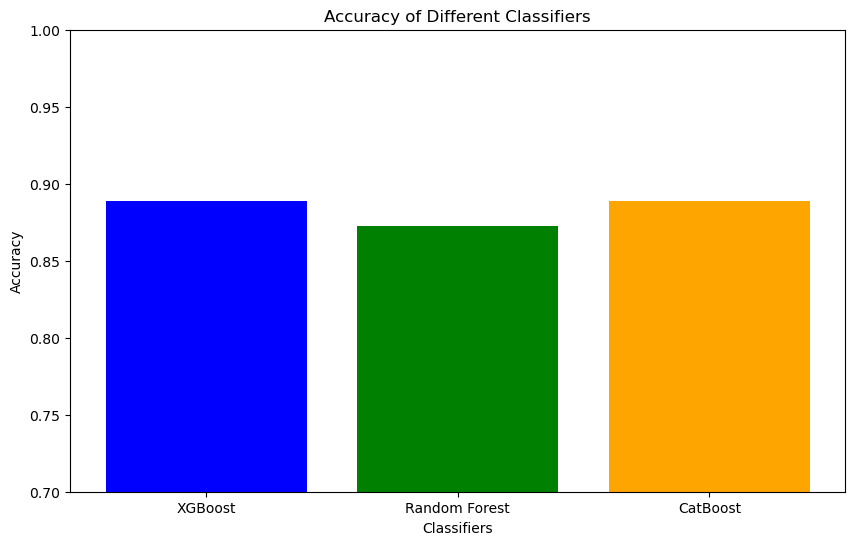

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'orange'])
plt.title('Accuracy of Different Classifiers')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)  # Set y-axis limits for better visualization
plt.grid(False)
plt.show()